In [50]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### About Dataset:

These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

Source: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

In [51]:
df = pd.read_csv('data/ratings_small.csv')
df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


### $\textbf{EDA for Recommender System}$

$\textbf{Unique Counts and Data Shape}:$ Primeiramente é preciso realizar uma avaliação dos valores unicos que estão inclusos no dataset.

userId         671
movieId       9066
rating          10
timestamp    78141
dtype: int64


<Axes: xlabel='None', ylabel='None'>

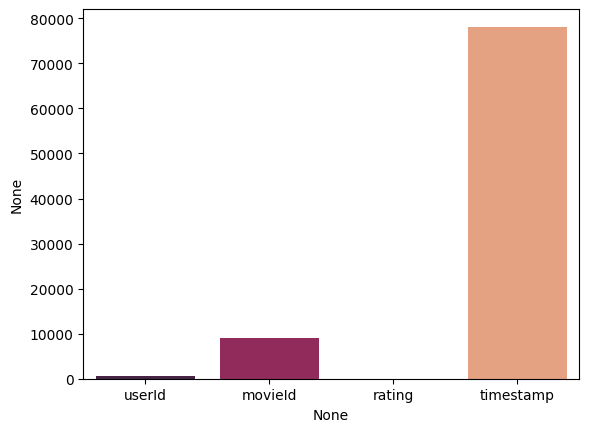

In [52]:
# get the unique counts of each column
print(df.nunique(axis=0))
sns.barplot(x=df.columns, y=df.nunique(axis=0), palette='rocket', hue=df.columns, legend=False)

$\textbf{Unvariate analysis}$: Analise de uma feature por vez, isso é util para responder algumas questões.
  - Qual o filme com os melhores reviews?
  - Qual o usuário que mais gera reviews?
  - Como se comporta a distribuição?

<Axes: ylabel='Frequency'>

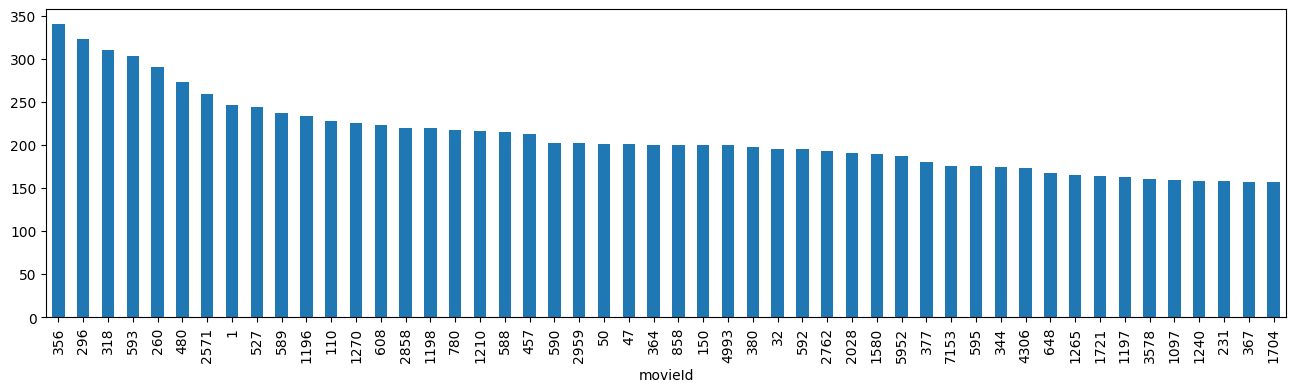

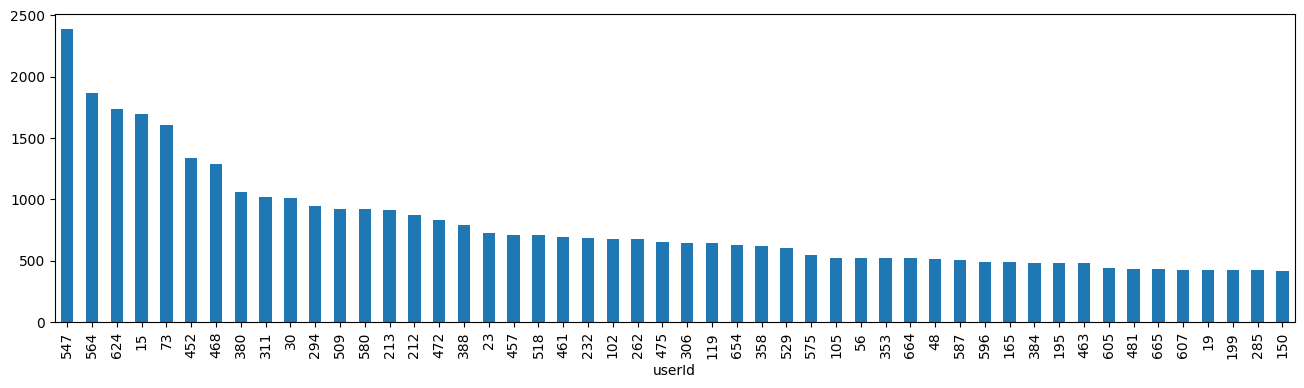

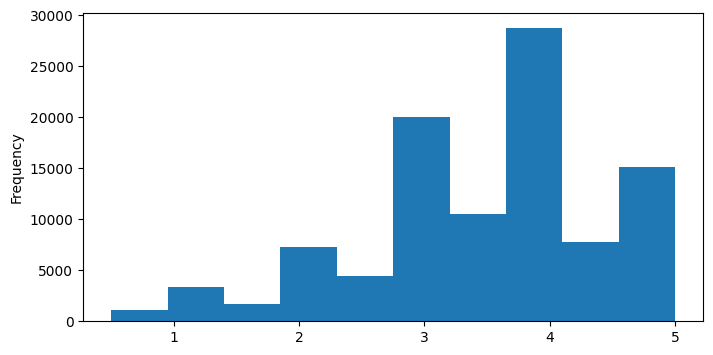

In [53]:
# univariate analysis
plt.figure(1, figsize = (16,4))
df['movieId'].value_counts()[:50].plot(kind = 'bar') #take top 50 movies
plt.figure(2, figsize = (16,4))
df['userId'].value_counts()[:50].plot(kind = 'bar') #take top 50 users
plt.figure(3, figsize = (8,4))
df['rating'].plot(kind = 'hist')

- As valiações não são igualmente distribuídas entre s filmes;
- As avaliações não são igualmente distribuídas entre os usuário;
- A maioria dos usuários atribuem uma avaliação por volta de 4.

### $\textbf{Aggregated Analysis}:$

1. Qual a distribuição das avaliações atribuídas a cada filme? O histograma mostra que a maioria dos usuários (aproximadamente 560 de 671 - 80%) se enquadra na faixa de classificações de 0 a 250

<Axes: >

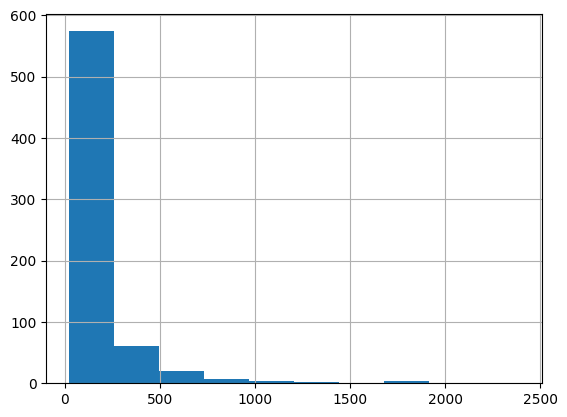

In [54]:
ratings_per_user = df.groupby('userId')['movieId'].count() 
ratings_per_user.hist() 

2. Qual é a distribuição dos usuários que fornecem avaliações? - o histograma mostra que a maioria dos filmes (cerca de 8.200 de 9.066 - 90%) tem menos de 25 avaliações

<Axes: >

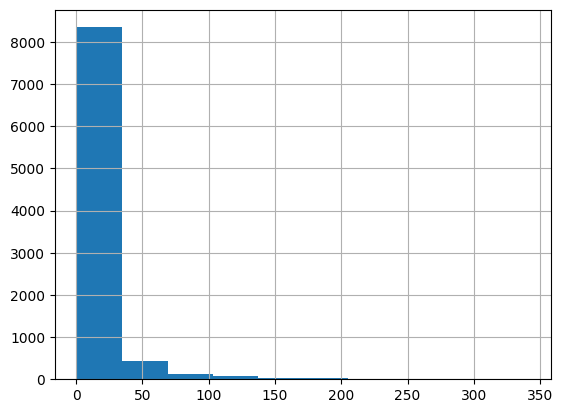

In [55]:
ratings_per_movie = df.groupby('movieId')['userId'].count() 
ratings_per_movie.hist()

Nesta fase, temos uma compreensão clara dos dados.

### $\textbf{Collaborative - Based Filtering Algorithms}:$

Serão utilizados dois algoritmos de filtragem baseados em colaboração, KNN e decomposição de valor singular. A biblioteca `surprise` em python nos permite implementar ambos os algoritmos.

In [56]:
from surprise import KNNWithMeans, SVD

In [57]:
# k Nearest Neighbour
similarity = {
    "name": "cosine",
    "user_based": False,  # item-based similarity
}
alg_KNN = KNNWithMeans(sim_options = similarity)

In [58]:
# SVD
alg_SVD = SVD()

Para melhor compreensão, é montada uma matriz userID x movieID

In [59]:
movie_rating_set = pd.crosstab(index= df.userId, columns= df.movieId, values= df.rating, aggfunc= 'mean')
movie_rating_set

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# $\textbf{KNN}:$

A opção `user_based: False` determina que este KNN usa similaridade baseada em item, de modo que estamos prevendo as classificações desconhecidas do item m1 com base em itens semelhantes com classificações conhecidas. Você pode pensar no algoritmo k vizinho mais próximo como representando itens de filme em um espaço n dimensional definido por n usuários. As distâncias entre os pontos são calculadas com base na similaridade do cosseno - que é determinada pelo ângulo entre dois vetores (conforme mostrado m1 e m2 no diagrama). A similaridade de cosseno é preferida em vez da distância euclidiana, porque sofre menos quando o conjunto de dados tem alta dimensionalidade.

# $\textbf{Singular Value Decomposition}:$

A decomposição de valor singular é uma técnica de fatoração de matriz que decompõe a matriz no produto de matrizes de dimensionalidade inferior e, em seguida, extrai os recursos latentes da importância mais alta para a mais baixa. Em vez de iterar por classificações individuais como KNN, ele vê a matriz de classificação como um todo. Portanto, tem menos custo computacional comparado ao KNN, mas também faz com que tenha menos interpretabilidade.

O SVD extrai os recursos latentes (que não são recursos reais contidos no conjunto de dados, mas o que o algoritmo descobriu magicamente como recursos ocultos valiosos) para formar as matrizes fatoradas U e V transpostas e as colocou em uma ordem decrescente de importância dos recursos. Em seguida, ele preenche as classificações em branco considerando o produto de U e V transposto em uma abordagem ponderada com base na importância do recurso. Esses parâmetros de recursos latentes são aprendidos iterativamente através da minimização da função de custo.

# $\textbf{Avaliação do Modelo}:$ 

A técnica de filtragem colaborativa representa o sistema de recomendação como um modelo supervisionado de regressão, onde a saída é um valor de classificação numérico. Assim, podemos aplicar métricas de avaliação de regressão ao nosso sistema de recomendação. Se você quiser se aprofundar nas métricas de avaliação para regressão, por exemplo. regressão linear, você pode achar útil a seção de avaliação do modelo em "Um Guia Simples e Prático para Regressão Linear". KNN e SVD são avaliados seguindo dois métodos.

- Cross Validation
- Train-Test split

### Cross Validation:

In [60]:
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

reader = Reader(rating_scale = (0,5))
rating_df = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
cross_validate_KNN = cross_validate(alg_KNN, rating_df, measures=['RMSE', 'MAE'], cv=5, verbose=True)
cross_validate_SVD = cross_validate(alg_SVD, rating_df, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9308  0.9351  0.9283  0.9163  0.9312  0.9283  0.0064  
MAE (testset)     0.7116  0.7183  0.7099  0.7032  0.7106  0.7107  0.0048  
Fit time          2.58    2.57    2.50    2.62    2.43    2.54    0.07    
Test time         3.65    3.36    3.96    3.51    3.47    3.59    0.21    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8973  0.8899  0.8981  0.9016  0.8

### Train-Test split:

In [61]:
from surprise.model_selection import train_test_split
from surprise import accuracy

# define train test function
def train_test_alg(alg, label):
    training_set, testing_set = train_test_split(rating_df, test_size = 0.2)
    alg.fit(training_set)
    test_output = alg.test(testing_set)
    test_df = pd.DataFrame(test_output)
    
    print("RMSE -",label, accuracy.rmse(test_output, verbose = False))
    print("MAE -", label, accuracy.mae(test_output, verbose=False))
    print("MSE -", label, accuracy.mse(test_output, verbose=False))
    return test_df

In [62]:
train_test_KNN = train_test_alg(alg_KNN, "alg_KNN")
print(train_test_KNN.head())

train_test_SVD = train_test_alg(alg_SVD, "alg_SVD")
print(train_test_SVD.head())

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE - alg_KNN 0.9262158769125395
MAE - alg_KNN 0.7100267579334977
MSE - alg_KNN 0.8578758506448645
   uid    iid  r_ui       est                                    details
0  500   2141   3.0  3.324156  {'actual_k': 40, 'was_impossible': False}
1   43   1958   4.0  3.517570  {'actual_k': 40, 'was_impossible': False}
2  474    260   4.0  4.238911  {'actual_k': 34, 'was_impossible': False}
3   34   2987   4.0  3.860690  {'actual_k': 40, 'was_impossible': False}
4  380  30822   3.0  3.952699  {'actual_k': 40, 'was_impossible': False}
RMSE - alg_SVD 0.8916837316367392
MAE - alg_SVD 0.686458273061751
MSE - alg_SVD 0.7950998772656203
   uid    iid  r_ui       est                    details
0   95   2294   4.0  4.024179  {'was_impossible': False}
1  260   1194   3.5  3.589143  {'was_impossible': False}
2  230  79132   5.0  4.642071  {'was_impossible': False}
3  384    481   3.0  3.177459  {'was_impossible': False}
4 

### $\textbf{Recommendation}:$

In [63]:
# load movie data and links data

movie_df = pd.read_csv('data/movies_metadata.csv')
links_df = pd.read_csv('data/links.csv')
movie_df['imdb_id'] = movie_df['imdb_id'].apply(lambda x: str(x)[2:].lstrip("0"))
links_df['imdbId'] = links_df['imdbId'].astype(str)

/tmp/ipykernel_8306/821441774.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_df = pd.read_csv('data/movies_metadata.csv')


In [64]:
def prediction(alg, users_K):
    pred_list = []
    for userId in range(1,users_K):
        for movieId in range(1,9067):
            rating = alg.predict(userId, movieId).est
            pred_list.append([userId, movieId, rating])
    pred_df = pd.DataFrame(pred_list, columns = ['userId', 'movieId', 'rating'])
    return pred_df

In [65]:
def top_recommendations(pred_df, top_N):
    link_movie = pd.merge(pred_df, links_df, how='inner', left_on='movieId', right_on='movieId')
    recommended_movie = pd.merge(link_movie, movie_df, how='left', left_on='imdbId', right_on='imdb_id')[['userId', 'movieId', 'rating', 'movieId','imdb_id','title']]
    sorted_df = recommended_movie.groupby(('userId'), as_index = False).apply(lambda x: x.sort_values(['rating'], ascending = False)).reset_index(drop=True)
    top_recommended_movies = sorted_df.groupby('userId').head(top_N)
    return sorted_df, top_recommended_movies

In [66]:
# KNN predictions
pred_KNN = prediction(alg_KNN, 10)
recommended_movies_KNN, top_recommended_movies_KNN = top_recommendations(pred_KNN, 3)

## SVD predictions
pred_SVD = prediction(alg_SVD, 10)
recommended_movies_SVD, top_recommended_movies_SVD = top_recommendations(pred_SVD, 3)

In [67]:
top_recommended_movies_KNN

,userId,movieId,rating,movieId,imdb_id,title
0,1,2843,5.0,2843,118843,"Black Cat, White Cat"
1,1,2820,5.0,2820,58175,Hamlet from the Lunt-Fontanne Theatre
2,1,820,5.0,820,49521,Death in the Garden
8341,2,6332,5.0,6332,306841,The Lizzie McGuire Movie
8342,2,559,5.0,559,107779,"Paris, France"
8343,2,3920,5.0,3920,107209,"Faraway, So Close!"
16682,3,759,5.0,759,110480,Maya Lin: A Strong Clear Vision
16683,3,3879,5.0,3879,160009,The Art of War
16684,3,2649,5.0,2649,31951,Son of Frankenstein
25023,4,3739,5.0,3739,23622,Trouble in Paradise


In [68]:
top_recommended_movies_SVD

,userId,movieId,rating,movieId,imdb_id,title
0,1,7153,3.893503,7153,167260,The Lord of the Rings: The Return of the King
1,1,3462,3.826795,3462,27977,Modern Times
2,1,1219,3.781899,1219,54215,Psycho
8341,2,1221,4.619715,1221,71562,The Godfather: Part II
8342,2,318,4.581914,318,111161,The Shawshank Redemption
8343,2,904,4.576697,904,47396,Rear Window
16682,3,2959,4.509340,2959,137523,Fight Club
16683,3,858,4.421905,858,68646,The Godfather
16684,3,318,4.376004,318,111161,The Shawshank Redemption
25023,4,1288,5.000000,1288,88258,This Is Spinal Tap


### $\textbf{Fontes}:$

Source: https://www.visual-design.net/post/how-to-build-a-collaborative-based-filtering-movie-recommendation-system